In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [3]:
#Clean data
e_data = pd.read_csv("https://www.dropbox.com/s/ey2y94hyfclgl98/clean_data.csv?dl=1")
e_data.head()

,Unnamed: 0,Latitude,Longitude,Depth,Magnitude,Month,Day,Year,Country Name,Density,Population
0,0,19.246,145.616,131.6,6.0,1,2.0,1965.0,United States,21,194303000
1,39,53.008,-162.008,17.8,6.4,2,6.0,1965.0,United States,21,194303000
2,44,53.191,-161.859,22.5,6.3,2,6.0,1965.0,United States,21,194303000
3,57,21.527,143.081,340.0,5.6,2,17.0,1965.0,United States,21,194303000
4,86,53.292,-162.331,20.0,5.7,3,13.0,1965.0,United States,21,194303000


In [4]:
e_data.columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Month',
       'Day', 'Year', 'Country Name', 'Density', 'Population'],
      dtype='object')

In [5]:
e_data['Year'] = e_data['Year'].apply(int)
e_data['Day'] = e_data['Day'].apply(int)

In [6]:
import datetime
start = datetime.datetime(1965,1,1)
current = datetime.datetime(e_data['Year'][0], e_data['Month'][0], e_data['Day'][0], 0, 0)
s = int((current - start).total_seconds())
s


86400

In [7]:
dates = list()
for i in range(len(e_data['Year'])):
    current = datetime.datetime(e_data['Year'][i], e_data['Month'][i], e_data['Day'][i], 0, 0)
    s = int((current - start).total_seconds())
    dates.append(s)
e_data['Date']=pd.Series(dates)
e_data

,Unnamed: 0,Latitude,Longitude,Depth,Magnitude,Month,Day,Year,Country Name,Density,Population,Date
0,0,19.2460,145.6160,131.60,6.0,1,2,1965,United States,21,194303000,86400
1,39,53.0080,-162.0080,17.80,6.4,2,6,1965,United States,21,194303000,3110400
2,44,53.1910,-161.8590,22.50,6.3,2,6,1965,United States,21,194303000,3110400
3,57,21.5270,143.0810,340.00,5.6,2,17,1965,United States,21,194303000,4060800
4,86,53.2920,-162.3310,20.00,5.7,3,13,1965,United States,21,194303000,6134400
...,...,...,...,...,...,...,...,...,...,...,...,...
18720,23325,6.1142,-82.5906,10.00,5.6,11,12,2016,Panama,54,4037078,1636675200
18721,23359,-35.2021,54.0219,10.00,5.5,12,1,2016,Madagascar,42,24894380,1638316800
18722,23365,11.0316,-60.9005,31.75,5.9,12,6,2016,United Kingdom,271,65595565,1638748800
18723,23397,-10.1785,160.9149,10.00,6.0,12,20,2016,Thailand,135,68971331,1639958400


In [8]:
e_data = e_data.drop(['Unnamed: 0','Month','Day','Year'],axis=1)
e_data

,Latitude,Longitude,Depth,Magnitude,Country Name,Density,Population,Date
0,19.2460,145.6160,131.60,6.0,United States,21,194303000,86400
1,53.0080,-162.0080,17.80,6.4,United States,21,194303000,3110400
2,53.1910,-161.8590,22.50,6.3,United States,21,194303000,3110400
3,21.5270,143.0810,340.00,5.6,United States,21,194303000,4060800
4,53.2920,-162.3310,20.00,5.7,United States,21,194303000,6134400
...,...,...,...,...,...,...,...,...
18720,6.1142,-82.5906,10.00,5.6,Panama,54,4037078,1636675200
18721,-35.2021,54.0219,10.00,5.5,Madagascar,42,24894380,1638316800
18722,11.0316,-60.9005,31.75,5.9,United Kingdom,271,65595565,1638748800
18723,-10.1785,160.9149,10.00,6.0,Thailand,135,68971331,1639958400


# Corroletion matrix

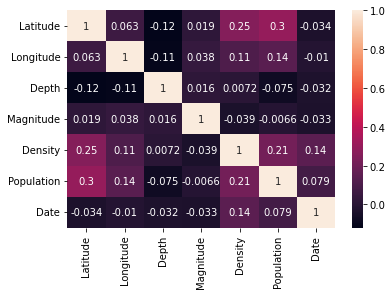

In [9]:
corrMatrix = e_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:

y = e_data['Latitude'].values
X = e_data['Longitude'].values.reshape(-1,1)

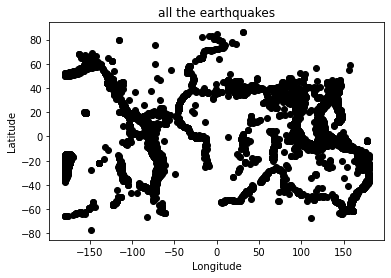

In [11]:
plt.scatter(X, y, color='black')
plt.title('all the earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Random forest

In [60]:
X = e_data[['Longitude', 'Latitude', 'Magnitude','Density']]
y = e_data['Date']

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

In [63]:
print("Score : ", forest.score(X_test,y_test))
print("Mean squared error : ", mean_squared_error(y_test,pred))

Score :  0.8796747230646548
Mean squared error :  2.4312730361728324e+16


In [39]:
forest = RandomForestRegressor(max_depth=3, random_state = 42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

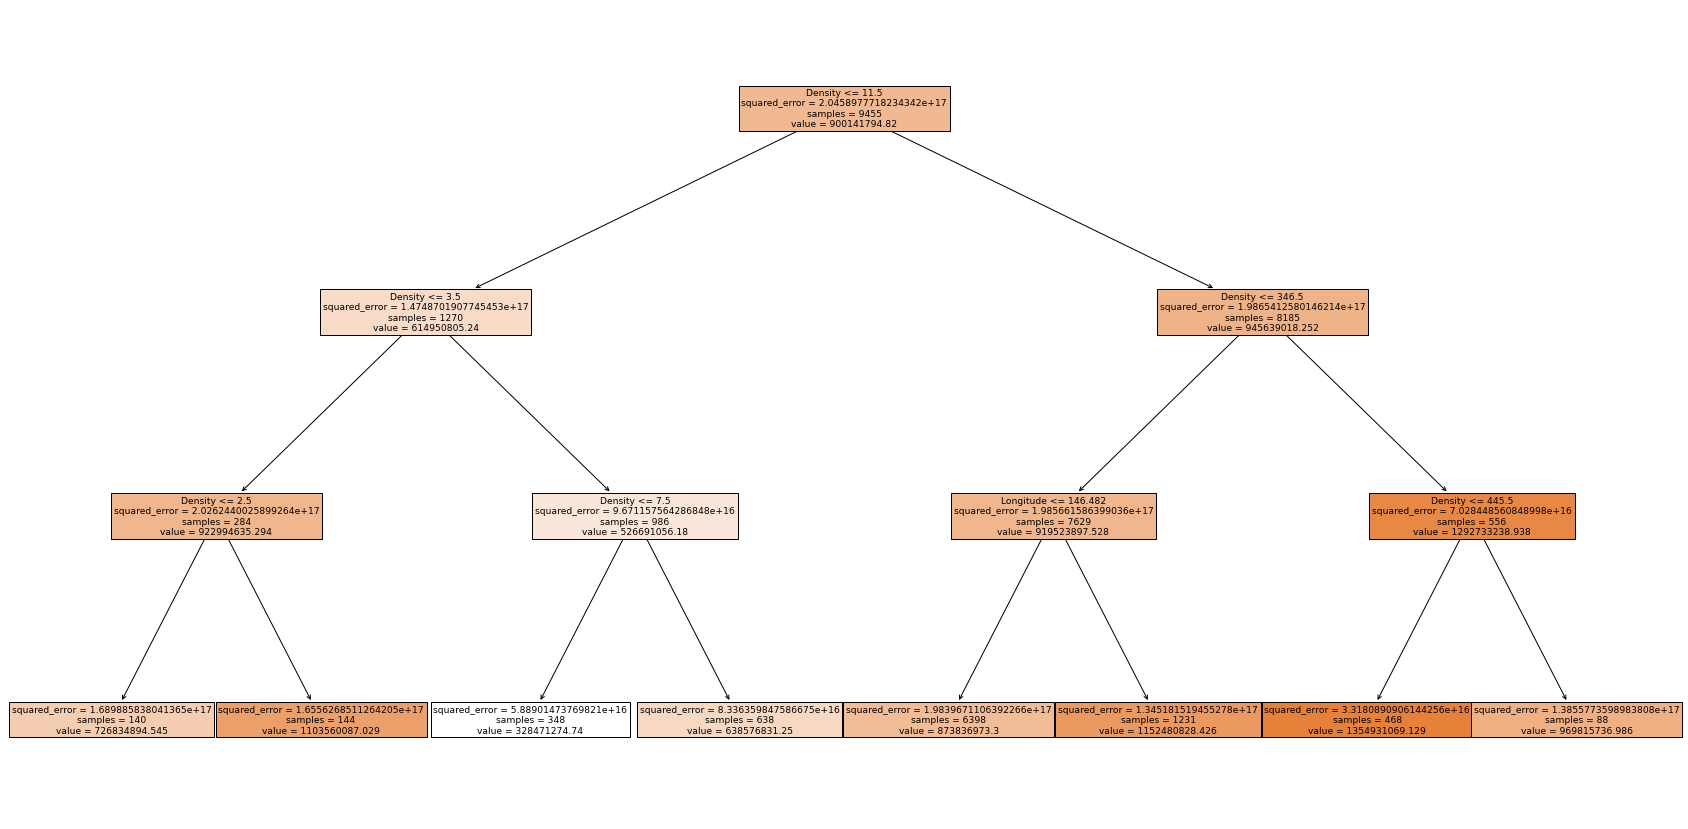

In [56]:

from dtreeviz.trees import dtreeviz # will be used for tree visualization

plt.rcParams['font.size'] = '14'
plt.figure(figsize=(30,15))
_ = tree.plot_tree(forest.estimators_[0], feature_names=X.columns, filled=True)

In [67]:
#_ = dtreeviz(forest.estimators_[0],X,y, feature_names=X.columns, target_name="Target")

<Figure size 2160x1080 with 0 Axes>

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH